In [3]:
# ## Installing all the library.....

# !pip install librosa
# !pip install pytube
# !pip install librosa numpy
# !pip install soundfile
# !pip install pydub
# !pip install resampy
# !pip show resampy
# !pip install tensorflow

In [1]:
#Importing all the files...........
import warnings
# Ignore a specific warning
warnings.filterwarnings("ignore")
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import csv
import os
%matplotlib inline

In [3]:
input_audio_files = ["D:/Research/Codes/UrbanSound8k/dog.wav",
                     "D:/Research/Codes/UrbanSound8k/siren.wav"]

for file in input_audio_files:
    # Load audio file using librosa
    data, sample_rate = librosa.load(file, sr=None)  # Setting sr=None returns the original sample rate

    # Print the sample rate for each file
    print(f"The sample rate of {file} is: {sample_rate} Hz")


The sample rate of D:/Research/Codes/UrbanSound8k/dog.wav is: 48000 Hz
The sample rate of D:/Research/Codes/UrbanSound8k/siren.wav is: 48000 Hz


In [4]:
# Display the audio...............
from IPython.display import Audio
audio_path = input_audio_files[0]
Audio(audio_path)

In [5]:
# Path to the CSV file
file_path = file_path = "D:/Research/Codes/UrbanSound8k/metadata/UrbanSound8K.csv"
df = pd.read_csv(file_path)
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [6]:
import pandas as pd
# Group by folder and class, and count the number of samples
folder_class_counts = df.groupby(['fold', 'class']).size().reset_index(name='count')

In [7]:
for folder in folder_class_counts['fold'].unique():
    print(f"\nFolder: {folder}")
    # Filter the DataFrame for the current folder
    folder_data = folder_class_counts[folder_class_counts['fold'] == folder]
    
    # Loop through each class in the current folder and print the count
    for _, row in folder_data.iterrows():
        print(f"Class: {row['class']}, Count: {row['count']}")


Folder: 1
Class: air_conditioner, Count: 100
Class: car_horn, Count: 36
Class: children_playing, Count: 100
Class: dog_bark, Count: 100
Class: drilling, Count: 100
Class: engine_idling, Count: 96
Class: gun_shot, Count: 35
Class: jackhammer, Count: 120
Class: siren, Count: 86
Class: street_music, Count: 100

Folder: 2
Class: air_conditioner, Count: 100
Class: car_horn, Count: 42
Class: children_playing, Count: 100
Class: dog_bark, Count: 100
Class: drilling, Count: 100
Class: engine_idling, Count: 100
Class: gun_shot, Count: 35
Class: jackhammer, Count: 120
Class: siren, Count: 91
Class: street_music, Count: 100

Folder: 3
Class: air_conditioner, Count: 100
Class: car_horn, Count: 43
Class: children_playing, Count: 100
Class: dog_bark, Count: 100
Class: drilling, Count: 100
Class: engine_idling, Count: 107
Class: gun_shot, Count: 36
Class: jackhammer, Count: 120
Class: siren, Count: 119
Class: street_music, Count: 100

Folder: 4
Class: air_conditioner, Count: 100
Class: car_horn, Coun

In [8]:
### Check whether the dataset is imbalanced
df['classID'].value_counts()

classID
3    1000
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
8     929
1     429
6     374
Name: count, dtype: int64

In [9]:
df.value_counts()

slice_file_name    fsID    start       end         salience  fold  classID  class     
100032-3-0-0.wav   100032  0.000000    0.317551    1         5     3        dog_bark      1
24347-8-0-73.wav   24347   40.620371   44.620371   2         4     8        siren         1
24347-8-0-68.wav   24347   38.120371   42.120371   2         4     8        siren         1
24347-8-0-69.wav   24347   38.620371   42.620371   2         4     8        siren         1
24347-8-0-7.wav    24347   7.620371    11.620371   2         4     8        siren         1
                                                                                         ..
162134-7-10-0.wav  162134  178.959326  182.959326  1         10    7        jackhammer    1
162134-7-1-0.wav   162134  18.663755   22.396505   1         10    7        jackhammer    1
162134-7-0-2.wav   162134  2.333125    6.333125    1         10    7        jackhammer    1
162134-7-0-1.wav   162134  1.833125    5.833125    1         10    7        jackhamme

In [10]:
### Let's read a sample audio using librosa
import librosa
audio_file_path="D:/Research/Codes/UrbanSound8k/dog.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

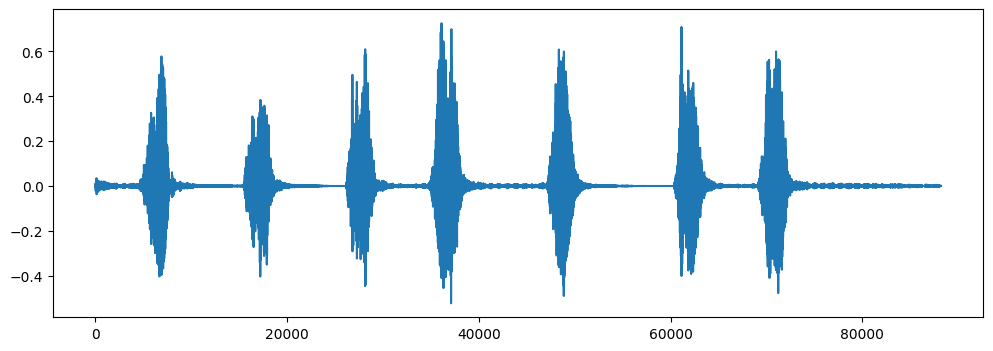

In [11]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=20)    # sr - sample rate
print(mfccs.shape)
mfccs_scaled_features = (mfccs - np.min(mfccs, axis=0)) / (np.max(mfccs, axis=0) - np.min(mfccs, axis=0))
mfccs_scaled_features

(20, 173)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.6075286 , 0.6065104 , 0.67758346, ..., 0.8781831 , 0.8913604 ,
        0.9175882 ],
       ...,
       [0.8142289 , 0.8169731 , 0.84709954, ..., 0.8680404 , 0.8778484 ,
        0.90320176],
       [0.81102943, 0.811355  , 0.84145707, ..., 0.87275606, 0.8785523 ,
        0.8970663 ],
       [0.79631156, 0.8013641 , 0.84090465, ..., 0.83915305, 0.8441295 ,
        0.8645132 ]], dtype=float32)

In [13]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path= 'D:/Research/Codes/UrbanSound8k/audio'
metadata=pd.read_csv('D:/Research/Codes/UrbanSound8k/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [14]:
import librosa
from sklearn.preprocessing import StandardScaler
import numpy as np

def features_extractor_standard(file, max_frames=400, n_mfcc=40):
    audio, sample_rate = librosa.load(file, sr=None, res_type='kaiser_fast')

    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

    # Ensure consistent length by padding or truncating
    if mfccs_features.shape[1] < max_frames:
        mfccs_features = np.pad(mfccs_features, ((0, 0), (0, max_frames - mfccs_features.shape[1])), mode='constant')
    else:
        mfccs_features = mfccs_features[:, :max_frames]

    # Standardize MFCC features
    scaler = StandardScaler()
    mfccs_scaled_features = scaler.fit_transform(mfccs_features)

    return mfccs_scaled_features

In [36]:
# import librosa
# import os
# from tqdm import tqdm
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# def features_extractor_min_max(file, max_frames=400, n_mfcc=40):
#     audio, sample_rate = librosa.load(file, sr=None, res_type='kaiser_fast')

#     # Extract MFCC features
#     mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

#     # Ensure consistent length by padding or truncating
#     if mfccs_features.shape[1] < max_frames:
#         mfccs_features = np.pad(mfccs_features, ((0, 0), (0, max_frames - mfccs_features.shape[1])), mode='constant')
#     else:
#         mfccs_features = mfccs_features[:, :max_frames]

#     # Min-max normalization of MFCC features
#     scaler = MinMaxScaler()
#     mfccs_scaled_features = scaler.fit_transform(mfccs_features.T).T

#     return mfccs_scaled_features

In [55]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor_standard(file_name)
    extracted_features.append([data,final_class_labels])

8732it [03:10, 45.92it/s]


In [56]:
len(extracted_features)

8732

In [57]:
extracted_features[0]

[array([[-6.0051804 , -5.507225  , -4.8580503 , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.5457492 ,  2.5891504 ,  3.1856654 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.15347151, -0.6584814 , -1.4117814 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.07233869,  0.21867411,  0.2425351 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.1894701 ,  0.2589383 ,  0.26829684, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.18778415,  0.17273435,  0.28566203, ...,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 'dog_bark']

In [58]:
# Convert extracted_features to a DataFrame
df = pd.DataFrame(extracted_features, columns=['Feature', 'class'])

In [59]:
df.head(10)

,Feature,class
0,"[[-6.0051804, -5.507225, -4.8580503, -4.149250...",dog_bark
1,"[[-6.079244, -5.971173, -5.872485, -5.867127, ...",children_playing
2,"[[-6.046803, -5.918717, -5.8346252, -5.875177,...",children_playing
3,"[[-5.837201, -5.800083, -5.7924314, -5.7579017...",children_playing
4,"[[-5.919988, -5.8032975, -5.758046, -5.7814827...",children_playing
5,"[[-6.031959, -5.9350667, -5.858229, -5.8803964...",children_playing
6,"[[-5.956183, -5.879771, -5.8428226, -5.854132,...",children_playing
7,"[[-6.002263, -5.9156356, -5.8292994, -5.837433...",children_playing
8,"[[-6.0290723, -5.9471893, -5.924251, -5.904716...",children_playing
9,"[[-6.0407834, -5.6191072, -5.1621723, -5.07063...",car_horn


In [60]:
df.dtypes

Feature    object
class      object
dtype: object

In [61]:
df['Feature'].shape

(8732,)

In [62]:
### Split the dataset into independent and dependent dataset
X=np.array(df['Feature'].tolist())
y=np.array(df['class'].tolist())

In [63]:
X.shape

(8732, 40, 400)

In [64]:
y.shape

(8732,)

In [65]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Assuming 'features' and 'class' are the columns in your DataFrame
X_all = np.array(df['Feature'].to_list())
y_all = df['class']

# Define the number of folds
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_all, y_all)):
    print(f"\nClass counts for fold {fold + 1}:")

    # Get the data for the current fold
    X_fold, y_fold = X_all[val_index], y_all.iloc[val_index]

    # Print sample counts of each class for the fold
    unique_classes_fold, class_counts_fold = np.unique(y_fold, return_counts=True)
    print(f"  Fold data:", dict(zip(unique_classes_fold, class_counts_fold)))

# Additional code for calculating and printing overall sample counts across all folds
unique_classes, class_counts = np.unique(y_all, return_counts=True)
print("\nOverall class counts for entire dataset across all folds:", dict(zip(unique_classes, class_counts)))


Class counts for fold 1:
  Fold data: {'air_conditioner': 100, 'car_horn': 43, 'children_playing': 100, 'dog_bark': 100, 'drilling': 100, 'engine_idling': 100, 'gun_shot': 38, 'jackhammer': 100, 'siren': 93, 'street_music': 100}

Class counts for fold 2:
  Fold data: {'air_conditioner': 100, 'car_horn': 43, 'children_playing': 100, 'dog_bark': 100, 'drilling': 100, 'engine_idling': 100, 'gun_shot': 38, 'jackhammer': 100, 'siren': 93, 'street_music': 100}

Class counts for fold 3:
  Fold data: {'air_conditioner': 100, 'car_horn': 43, 'children_playing': 100, 'dog_bark': 100, 'drilling': 100, 'engine_idling': 100, 'gun_shot': 38, 'jackhammer': 100, 'siren': 92, 'street_music': 100}

Class counts for fold 4:
  Fold data: {'air_conditioner': 100, 'car_horn': 43, 'children_playing': 100, 'dog_bark': 100, 'drilling': 100, 'engine_idling': 100, 'gun_shot': 37, 'jackhammer': 100, 'siren': 93, 'street_music': 100}

Class counts for fold 5:
  Fold data: {'air_conditioner': 100, 'car_horn': 43, 

In [66]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [67]:
y.shape

(8732, 10)

In [68]:
X.shape

(8732, 40, 400)

In [69]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold

In [78]:
# Define the number of folds
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Loop over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X, np.argmax(y, axis=1))):
    print(f"Training on fold {fold + 1}/{num_folds}")

    # Create the 1D CNN model
    model = Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', use_bias=False, input_shape=(40, 400)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')  # Assuming you have 10 classes
    ])

    # Compile the model 
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Set up TensorBoard for each fold
    log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S") + f"_fold_{fold + 1}"
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Define early stopping
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model for the current fold
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=150,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[tensorboard_callback]#, early_stopping]
    )

    # Evaluate the model on the validation set for the current fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    fold_accuracies.append(accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

Training on fold 1/10
Epoch 1/150
246/246 [==============================] - 9s 29ms/step - loss: 3.5864 - accuracy: 0.3507 - val_loss: 2.7983 - val_accuracy: 0.5229
Epoch 2/150
246/246 [==============================] - 7s 28ms/step - loss: 2.5026 - accuracy: 0.5304 - val_loss: 2.1435 - val_accuracy: 0.6201
Epoch 3/150
246/246 [==============================] - 6s 25ms/step - loss: 2.0010 - accuracy: 0.6108 - val_loss: 1.8076 - val_accuracy: 0.6934
Epoch 4/150
246/246 [==============================] - 6s 23ms/step - loss: 1.7179 - accuracy: 0.6676 - val_loss: 1.5739 - val_accuracy: 0.6991
Epoch 5/150
246/246 [==============================] - 6s 26ms/step - loss: 1.5118 - accuracy: 0.7068 - val_loss: 1.4000 - val_accuracy: 0.7540
Epoch 6/150
246/246 [==============================] - 6s 25ms/step - loss: 1.3563 - accuracy: 0.7419 - val_loss: 1.2677 - val_accuracy: 0.7757
Epoch 7/150
246/246 [==============================] - 6s 24ms/step - loss: 1.2222 - accuracy: 0.7712 - val_loss: 

246/246 [==============================] - 6s 24ms/step - loss: 0.1960 - accuracy: 0.9789 - val_loss: 0.3354 - val_accuracy: 0.9348
Epoch 58/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1957 - accuracy: 0.9779 - val_loss: 0.3289 - val_accuracy: 0.9302
Epoch 59/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1950 - accuracy: 0.9768 - val_loss: 0.3137 - val_accuracy: 0.9336
Epoch 60/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1874 - accuracy: 0.9793 - val_loss: 0.3378 - val_accuracy: 0.9314
Epoch 61/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1872 - accuracy: 0.9803 - val_loss: 0.3365 - val_accuracy: 0.9359
Epoch 62/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1883 - accuracy: 0.9780 - val_loss: 0.3500 - val_accuracy: 0.9245
Epoch 63/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1777 - accuracy: 0.9810 - val_loss: 0.3065 - val_accuracy: 0.929

246/246 [==============================] - 6s 26ms/step - loss: 0.0995 - accuracy: 0.9908 - val_loss: 0.2691 - val_accuracy: 0.9405
Epoch 114/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0926 - accuracy: 0.9921 - val_loss: 0.2689 - val_accuracy: 0.9371
Epoch 115/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0929 - accuracy: 0.9916 - val_loss: 0.2859 - val_accuracy: 0.9371
Epoch 116/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0943 - accuracy: 0.9916 - val_loss: 0.2973 - val_accuracy: 0.9336
Epoch 117/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1010 - accuracy: 0.9883 - val_loss: 0.2750 - val_accuracy: 0.9405
Epoch 118/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0977 - accuracy: 0.9896 - val_loss: 0.2776 - val_accuracy: 0.9428
Epoch 119/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0944 - accuracy: 0.9922 - val_loss: 0.2743 - val_accuracy:

246/246 [==============================] - 6s 22ms/step - loss: 0.6238 - accuracy: 0.8894 - val_loss: 0.6442 - val_accuracy: 0.8719
Epoch 19/150
246/246 [==============================] - 5s 21ms/step - loss: 0.5950 - accuracy: 0.8940 - val_loss: 0.6341 - val_accuracy: 0.8776
Epoch 20/150
246/246 [==============================] - 6s 24ms/step - loss: 0.5705 - accuracy: 0.8988 - val_loss: 0.6125 - val_accuracy: 0.8764
Epoch 21/150
246/246 [==============================] - 6s 23ms/step - loss: 0.5540 - accuracy: 0.9039 - val_loss: 0.5987 - val_accuracy: 0.8719
Epoch 22/150
246/246 [==============================] - 6s 24ms/step - loss: 0.5377 - accuracy: 0.9054 - val_loss: 0.5785 - val_accuracy: 0.8879
Epoch 23/150
246/246 [==============================] - 6s 24ms/step - loss: 0.5155 - accuracy: 0.9141 - val_loss: 0.5579 - val_accuracy: 0.8936
Epoch 24/150
246/246 [==============================] - 6s 24ms/step - loss: 0.4932 - accuracy: 0.9146 - val_loss: 0.5495 - val_accuracy: 0.898

246/246 [==============================] - 6s 24ms/step - loss: 0.1694 - accuracy: 0.9804 - val_loss: 0.3623 - val_accuracy: 0.9188
Epoch 75/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1678 - accuracy: 0.9807 - val_loss: 0.3249 - val_accuracy: 0.9302
Epoch 76/150
246/246 [==============================] - 7s 26ms/step - loss: 0.1662 - accuracy: 0.9808 - val_loss: 0.3227 - val_accuracy: 0.9268
Epoch 77/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1556 - accuracy: 0.9855 - val_loss: 0.3408 - val_accuracy: 0.9165
Epoch 78/150
246/246 [==============================] - 7s 29ms/step - loss: 0.1506 - accuracy: 0.9852 - val_loss: 0.3424 - val_accuracy: 0.9291
Epoch 79/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1569 - accuracy: 0.9832 - val_loss: 0.3360 - val_accuracy: 0.9245
Epoch 80/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1536 - accuracy: 0.9828 - val_loss: 0.3441 - val_accuracy: 0.922

246/246 [==============================] - 6s 25ms/step - loss: 0.1007 - accuracy: 0.9887 - val_loss: 0.3271 - val_accuracy: 0.9256
Epoch 131/150
246/246 [==============================] - 6s 24ms/step - loss: 0.0980 - accuracy: 0.9894 - val_loss: 0.2961 - val_accuracy: 0.9428
Epoch 132/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1078 - accuracy: 0.9855 - val_loss: 0.3052 - val_accuracy: 0.9291
Epoch 133/150
246/246 [==============================] - 7s 26ms/step - loss: 0.0949 - accuracy: 0.9911 - val_loss: 0.2960 - val_accuracy: 0.9371
Epoch 134/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0902 - accuracy: 0.9917 - val_loss: 0.3016 - val_accuracy: 0.9359
Epoch 135/150
246/246 [==============================] - 6s 24ms/step - loss: 0.0885 - accuracy: 0.9924 - val_loss: 0.3173 - val_accuracy: 0.9325
Epoch 136/150
246/246 [==============================] - 6s 24ms/step - loss: 0.0886 - accuracy: 0.9924 - val_loss: 0.2975 - val_accuracy:

Epoch 36/150
246/246 [==============================] - 5s 22ms/step - loss: 0.3273 - accuracy: 0.9562 - val_loss: 0.4106 - val_accuracy: 0.9290
Epoch 37/150
246/246 [==============================] - 6s 24ms/step - loss: 0.3195 - accuracy: 0.9571 - val_loss: 0.3934 - val_accuracy: 0.9278
Epoch 38/150
246/246 [==============================] - 6s 23ms/step - loss: 0.3115 - accuracy: 0.9588 - val_loss: 0.4079 - val_accuracy: 0.9210
Epoch 39/150
246/246 [==============================] - 6s 22ms/step - loss: 0.3027 - accuracy: 0.9597 - val_loss: 0.3745 - val_accuracy: 0.9393
Epoch 40/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2995 - accuracy: 0.9580 - val_loss: 0.4036 - val_accuracy: 0.9267
Epoch 41/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2918 - accuracy: 0.9618 - val_loss: 0.3975 - val_accuracy: 0.9255
Epoch 42/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2776 - accuracy: 0.9670 - val_loss: 0.3597 - val_ac

246/246 [==============================] - 6s 23ms/step - loss: 0.1189 - accuracy: 0.9896 - val_loss: 0.2484 - val_accuracy: 0.9473
Epoch 93/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1227 - accuracy: 0.9870 - val_loss: 0.2850 - val_accuracy: 0.9255
Epoch 94/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1246 - accuracy: 0.9879 - val_loss: 0.2684 - val_accuracy: 0.9359
Epoch 95/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1219 - accuracy: 0.9874 - val_loss: 0.2583 - val_accuracy: 0.9416
Epoch 96/150
246/246 [==============================] - 5s 22ms/step - loss: 0.1143 - accuracy: 0.9908 - val_loss: 0.2773 - val_accuracy: 0.9347
Epoch 97/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1092 - accuracy: 0.9929 - val_loss: 0.2600 - val_accuracy: 0.9301
Epoch 98/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1158 - accuracy: 0.9878 - val_loss: 0.2518 - val_accuracy: 0.934

246/246 [==============================] - 5s 22ms/step - loss: 0.0883 - accuracy: 0.9882 - val_loss: 0.2145 - val_accuracy: 0.9507
Epoch 149/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0720 - accuracy: 0.9950 - val_loss: 0.2192 - val_accuracy: 0.9496
Epoch 150/150
28/28 [==============================] - 0s 8ms/step - loss: 0.2377 - accuracy: 0.9393
Training on fold 4/10
Epoch 1/150
246/246 [==============================] - 6s 20ms/step - loss: 3.5393 - accuracy: 0.3406 - val_loss: 2.7314 - val_accuracy: 0.4926
Epoch 2/150
246/246 [==============================] - 6s 23ms/step - loss: 2.4715 - accuracy: 0.5302 - val_loss: 2.1005 - val_accuracy: 0.6415
Epoch 3/150
246/246 [==============================] - 5s 22ms/step - loss: 1.9964 - accuracy: 0.6190 - val_loss: 1.7738 - val_accuracy: 0.6873
Epoch 4/150
246/246 [==============================] - 6s 22ms/step - loss: 1.7150 - accuracy: 0.6699 - val_loss: 1.5758 - val_accuracy: 0.7136
Epoch 5/150
246/246 [==

Epoch 54/150
246/246 [==============================] - 6s 23ms/step - loss: 0.2282 - accuracy: 0.9697 - val_loss: 0.3816 - val_accuracy: 0.9244
Epoch 55/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2170 - accuracy: 0.9752 - val_loss: 0.3926 - val_accuracy: 0.9175
Epoch 56/150
246/246 [==============================] - 6s 23ms/step - loss: 0.2110 - accuracy: 0.9765 - val_loss: 0.3883 - val_accuracy: 0.9336
Epoch 57/150
246/246 [==============================] - 6s 23ms/step - loss: 0.2088 - accuracy: 0.9752 - val_loss: 0.4285 - val_accuracy: 0.9003
Epoch 58/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2078 - accuracy: 0.9756 - val_loss: 0.4174 - val_accuracy: 0.9107
Epoch 59/150
246/246 [==============================] - 5s 21ms/step - loss: 0.2027 - accuracy: 0.9767 - val_loss: 0.4081 - val_accuracy: 0.9129
Epoch 60/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2024 - accuracy: 0.9757 - val_loss: 0.3821 - val_ac

246/246 [==============================] - 5s 21ms/step - loss: 0.1091 - accuracy: 0.9887 - val_loss: 0.3385 - val_accuracy: 0.9336
Epoch 111/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1014 - accuracy: 0.9897 - val_loss: 0.3350 - val_accuracy: 0.9381
Epoch 112/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1057 - accuracy: 0.9889 - val_loss: 0.3661 - val_accuracy: 0.9244
Epoch 113/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1062 - accuracy: 0.9889 - val_loss: 0.3466 - val_accuracy: 0.9370
Epoch 114/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1029 - accuracy: 0.9885 - val_loss: 0.3517 - val_accuracy: 0.9290
Epoch 115/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0921 - accuracy: 0.9933 - val_loss: 0.3366 - val_accuracy: 0.9347
Epoch 116/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0956 - accuracy: 0.9919 - val_loss: 0.3763 - val_accuracy:

246/246 [==============================] - 5s 21ms/step - loss: 0.7103 - accuracy: 0.8757 - val_loss: 0.7324 - val_accuracy: 0.8683
Epoch 16/150
246/246 [==============================] - 5s 21ms/step - loss: 0.6787 - accuracy: 0.8876 - val_loss: 0.7116 - val_accuracy: 0.8717
Epoch 17/150
246/246 [==============================] - 5s 20ms/step - loss: 0.6457 - accuracy: 0.8884 - val_loss: 0.6802 - val_accuracy: 0.8706
Epoch 18/150
246/246 [==============================] - 5s 20ms/step - loss: 0.6155 - accuracy: 0.8973 - val_loss: 0.6453 - val_accuracy: 0.8889
Epoch 19/150
246/246 [==============================] - 5s 20ms/step - loss: 0.5857 - accuracy: 0.9070 - val_loss: 0.6446 - val_accuracy: 0.8809
Epoch 20/150
246/246 [==============================] - 5s 20ms/step - loss: 0.5595 - accuracy: 0.9091 - val_loss: 0.6066 - val_accuracy: 0.8992
Epoch 21/150
246/246 [==============================] - 5s 21ms/step - loss: 0.5384 - accuracy: 0.9133 - val_loss: 0.5947 - val_accuracy: 0.898

246/246 [==============================] - 6s 22ms/step - loss: 0.1642 - accuracy: 0.9804 - val_loss: 0.3181 - val_accuracy: 0.9347
Epoch 72/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1569 - accuracy: 0.9849 - val_loss: 0.3209 - val_accuracy: 0.9347
Epoch 73/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1563 - accuracy: 0.9841 - val_loss: 0.3657 - val_accuracy: 0.9210
Epoch 74/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1442 - accuracy: 0.9871 - val_loss: 0.3157 - val_accuracy: 0.9313
Epoch 75/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1449 - accuracy: 0.9868 - val_loss: 0.3340 - val_accuracy: 0.9278
Epoch 76/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1422 - accuracy: 0.9874 - val_loss: 0.3121 - val_accuracy: 0.9393
Epoch 77/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1419 - accuracy: 0.9868 - val_loss: 0.3277 - val_accuracy: 0.925

246/246 [==============================] - 5s 20ms/step - loss: 0.0820 - accuracy: 0.9935 - val_loss: 0.2911 - val_accuracy: 0.9450
Epoch 128/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0889 - accuracy: 0.9917 - val_loss: 0.2716 - val_accuracy: 0.9393
Epoch 129/150
246/246 [==============================] - 5s 20ms/step - loss: 0.0941 - accuracy: 0.9906 - val_loss: 0.2970 - val_accuracy: 0.9324
Epoch 130/150
246/246 [==============================] - 5s 20ms/step - loss: 0.0906 - accuracy: 0.9896 - val_loss: 0.3025 - val_accuracy: 0.9439
Epoch 131/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0904 - accuracy: 0.9915 - val_loss: 0.2880 - val_accuracy: 0.9404
Epoch 132/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0804 - accuracy: 0.9936 - val_loss: 0.2745 - val_accuracy: 0.9404
Epoch 133/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0828 - accuracy: 0.9925 - val_loss: 0.2756 - val_accuracy:

Epoch 33/150
246/246 [==============================] - 8s 34ms/step - loss: 0.3504 - accuracy: 0.9513 - val_loss: 0.4878 - val_accuracy: 0.9003
Epoch 34/150
246/246 [==============================] - 8s 34ms/step - loss: 0.3460 - accuracy: 0.9520 - val_loss: 0.4709 - val_accuracy: 0.9152
Epoch 35/150
246/246 [==============================] - 8s 33ms/step - loss: 0.3368 - accuracy: 0.9508 - val_loss: 0.4910 - val_accuracy: 0.8992
Epoch 36/150
246/246 [==============================] - 8s 32ms/step - loss: 0.3286 - accuracy: 0.9529 - val_loss: 0.4540 - val_accuracy: 0.9221
Epoch 37/150
246/246 [==============================] - 8s 32ms/step - loss: 0.3176 - accuracy: 0.9572 - val_loss: 0.4417 - val_accuracy: 0.9152
Epoch 38/150
246/246 [==============================] - 8s 33ms/step - loss: 0.3026 - accuracy: 0.9595 - val_loss: 0.4539 - val_accuracy: 0.9141
Epoch 39/150
246/246 [==============================] - 8s 33ms/step - loss: 0.3028 - accuracy: 0.9590 - val_loss: 0.4523 - val_ac

246/246 [==============================] - 9s 35ms/step - loss: 0.1296 - accuracy: 0.9851 - val_loss: 0.3230 - val_accuracy: 0.9347
Epoch 90/150
246/246 [==============================] - 8s 34ms/step - loss: 0.1354 - accuracy: 0.9838 - val_loss: 0.3585 - val_accuracy: 0.9267
Epoch 91/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1259 - accuracy: 0.9871 - val_loss: 0.3432 - val_accuracy: 0.9359
Epoch 92/150
246/246 [==============================] - 7s 30ms/step - loss: 0.1277 - accuracy: 0.9877 - val_loss: 0.3487 - val_accuracy: 0.9221
Epoch 93/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1206 - accuracy: 0.9885 - val_loss: 0.3266 - val_accuracy: 0.9381
Epoch 94/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1186 - accuracy: 0.9896 - val_loss: 0.3291 - val_accuracy: 0.9336
Epoch 95/150
246/246 [==============================] - 8s 34ms/step - loss: 0.1232 - accuracy: 0.9871 - val_loss: 0.3504 - val_accuracy: 0.930

246/246 [==============================] - 7s 28ms/step - loss: 0.0853 - accuracy: 0.9910 - val_loss: 0.3277 - val_accuracy: 0.9290
Epoch 146/150
246/246 [==============================] - 8s 32ms/step - loss: 0.0806 - accuracy: 0.9935 - val_loss: 0.3340 - val_accuracy: 0.9221
Epoch 147/150
246/246 [==============================] - 8s 34ms/step - loss: 0.0851 - accuracy: 0.9905 - val_loss: 0.3225 - val_accuracy: 0.9290
Epoch 148/150
246/246 [==============================] - 8s 31ms/step - loss: 0.0746 - accuracy: 0.9939 - val_loss: 0.3329 - val_accuracy: 0.9313
Epoch 149/150
246/246 [==============================] - 8s 30ms/step - loss: 0.0738 - accuracy: 0.9948 - val_loss: 0.3360 - val_accuracy: 0.9313
Epoch 150/150
28/28 [==============================] - 0s 13ms/step - loss: 0.3573 - accuracy: 0.9198
Training on fold 7/10
Epoch 1/150
246/246 [==============================] - 10s 34ms/step - loss: 3.4958 - accuracy: 0.3705 - val_loss: 2.7395 - val_accuracy: 0.5372
Epoch 2/150
246

Epoch 51/150
246/246 [==============================] - 8s 31ms/step - loss: 0.2404 - accuracy: 0.9688 - val_loss: 0.3703 - val_accuracy: 0.9290
Epoch 52/150
246/246 [==============================] - 7s 30ms/step - loss: 0.2343 - accuracy: 0.9716 - val_loss: 0.3881 - val_accuracy: 0.9187
Epoch 53/150
246/246 [==============================] - 7s 27ms/step - loss: 0.2347 - accuracy: 0.9695 - val_loss: 0.3718 - val_accuracy: 0.9244
Epoch 54/150
246/246 [==============================] - 7s 29ms/step - loss: 0.2253 - accuracy: 0.9709 - val_loss: 0.3642 - val_accuracy: 0.9313
Epoch 55/150
246/246 [==============================] - 8s 32ms/step - loss: 0.2233 - accuracy: 0.9720 - val_loss: 0.3575 - val_accuracy: 0.9301
Epoch 56/150
246/246 [==============================] - 7s 28ms/step - loss: 0.2228 - accuracy: 0.9716 - val_loss: 0.3791 - val_accuracy: 0.9290
Epoch 57/150
246/246 [==============================] - 8s 32ms/step - loss: 0.2092 - accuracy: 0.9771 - val_loss: 0.3601 - val_ac

246/246 [==============================] - 8s 32ms/step - loss: 0.1076 - accuracy: 0.9896 - val_loss: 0.3083 - val_accuracy: 0.9393
Epoch 108/150
246/246 [==============================] - 8s 33ms/step - loss: 0.1089 - accuracy: 0.9889 - val_loss: 0.3067 - val_accuracy: 0.9450
Epoch 109/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1113 - accuracy: 0.9882 - val_loss: 0.2918 - val_accuracy: 0.9439
Epoch 110/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1078 - accuracy: 0.9882 - val_loss: 0.3043 - val_accuracy: 0.9393
Epoch 111/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1104 - accuracy: 0.9885 - val_loss: 0.3050 - val_accuracy: 0.9347
Epoch 112/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1084 - accuracy: 0.9889 - val_loss: 0.2731 - val_accuracy: 0.9359
Epoch 113/150
246/246 [==============================] - 7s 30ms/step - loss: 0.1062 - accuracy: 0.9880 - val_loss: 0.2982 - val_accuracy:

246/246 [==============================] - 8s 32ms/step - loss: 0.8412 - accuracy: 0.8445 - val_loss: 0.8704 - val_accuracy: 0.8305
Epoch 13/150
246/246 [==============================] - 8s 32ms/step - loss: 0.8007 - accuracy: 0.8501 - val_loss: 0.8139 - val_accuracy: 0.8419
Epoch 14/150
246/246 [==============================] - 8s 31ms/step - loss: 0.7457 - accuracy: 0.8664 - val_loss: 0.7629 - val_accuracy: 0.8614
Epoch 15/150
246/246 [==============================] - 8s 31ms/step - loss: 0.7102 - accuracy: 0.8724 - val_loss: 0.7553 - val_accuracy: 0.8557
Epoch 16/150
246/246 [==============================] - 8s 31ms/step - loss: 0.6710 - accuracy: 0.8812 - val_loss: 0.7034 - val_accuracy: 0.8694
Epoch 17/150
246/246 [==============================] - 8s 31ms/step - loss: 0.6444 - accuracy: 0.8857 - val_loss: 0.6705 - val_accuracy: 0.8843
Epoch 18/150
246/246 [==============================] - 8s 31ms/step - loss: 0.6166 - accuracy: 0.8934 - val_loss: 0.6348 - val_accuracy: 0.891

246/246 [==============================] - 8s 34ms/step - loss: 0.1647 - accuracy: 0.9840 - val_loss: 0.3172 - val_accuracy: 0.9439
Epoch 69/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1665 - accuracy: 0.9831 - val_loss: 0.3246 - val_accuracy: 0.9370
Epoch 70/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1670 - accuracy: 0.9814 - val_loss: 0.3266 - val_accuracy: 0.9404
Epoch 71/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1642 - accuracy: 0.9826 - val_loss: 0.3072 - val_accuracy: 0.9473
Epoch 72/150
246/246 [==============================] - 8s 32ms/step - loss: 0.1567 - accuracy: 0.9855 - val_loss: 0.3156 - val_accuracy: 0.9507
Epoch 73/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1547 - accuracy: 0.9845 - val_loss: 0.3173 - val_accuracy: 0.9404
Epoch 74/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1590 - accuracy: 0.9813 - val_loss: 0.3039 - val_accuracy: 0.941

246/246 [==============================] - 7s 29ms/step - loss: 0.0926 - accuracy: 0.9903 - val_loss: 0.3239 - val_accuracy: 0.9290
Epoch 125/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0986 - accuracy: 0.9894 - val_loss: 0.2831 - val_accuracy: 0.9416
Epoch 126/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0944 - accuracy: 0.9917 - val_loss: 0.2996 - val_accuracy: 0.9404
Epoch 127/150
246/246 [==============================] - 7s 29ms/step - loss: 0.0926 - accuracy: 0.9920 - val_loss: 0.2984 - val_accuracy: 0.9359
Epoch 128/150
246/246 [==============================] - 8s 31ms/step - loss: 0.1000 - accuracy: 0.9892 - val_loss: 0.2713 - val_accuracy: 0.9427
Epoch 129/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0866 - accuracy: 0.9921 - val_loss: 0.3095 - val_accuracy: 0.9450
Epoch 130/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0911 - accuracy: 0.9908 - val_loss: 0.2945 - val_accuracy:

Epoch 30/150
246/246 [==============================] - 7s 28ms/step - loss: 0.3830 - accuracy: 0.9411 - val_loss: 0.4801 - val_accuracy: 0.9072
Epoch 31/150
246/246 [==============================] - 7s 26ms/step - loss: 0.3730 - accuracy: 0.9426 - val_loss: 0.4848 - val_accuracy: 0.9003
Epoch 32/150
246/246 [==============================] - 6s 26ms/step - loss: 0.3552 - accuracy: 0.9486 - val_loss: 0.4844 - val_accuracy: 0.9118
Epoch 33/150
246/246 [==============================] - 7s 27ms/step - loss: 0.3487 - accuracy: 0.9494 - val_loss: 0.4758 - val_accuracy: 0.9129
Epoch 34/150
246/246 [==============================] - 6s 26ms/step - loss: 0.3372 - accuracy: 0.9519 - val_loss: 0.4401 - val_accuracy: 0.9164
Epoch 35/150
246/246 [==============================] - 7s 27ms/step - loss: 0.3330 - accuracy: 0.9513 - val_loss: 0.4571 - val_accuracy: 0.9061
Epoch 36/150
246/246 [==============================] - 7s 27ms/step - loss: 0.3176 - accuracy: 0.9567 - val_loss: 0.4398 - val_ac

246/246 [==============================] - 7s 27ms/step - loss: 0.1305 - accuracy: 0.9871 - val_loss: 0.3518 - val_accuracy: 0.9290
Epoch 87/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1209 - accuracy: 0.9902 - val_loss: 0.3249 - val_accuracy: 0.9301
Epoch 88/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1297 - accuracy: 0.9868 - val_loss: 0.3351 - val_accuracy: 0.9290
Epoch 89/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1208 - accuracy: 0.9892 - val_loss: 0.3349 - val_accuracy: 0.9347
Epoch 90/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1202 - accuracy: 0.9883 - val_loss: 0.4441 - val_accuracy: 0.9049
Epoch 91/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1221 - accuracy: 0.9883 - val_loss: 0.3236 - val_accuracy: 0.9324
Epoch 92/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1260 - accuracy: 0.9860 - val_loss: 0.3224 - val_accuracy: 0.934

246/246 [==============================] - 6s 25ms/step - loss: 0.0876 - accuracy: 0.9905 - val_loss: 0.3631 - val_accuracy: 0.9267
Epoch 143/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0841 - accuracy: 0.9921 - val_loss: 0.3343 - val_accuracy: 0.9255
Epoch 144/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0701 - accuracy: 0.9969 - val_loss: 0.3397 - val_accuracy: 0.9301
Epoch 145/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0844 - accuracy: 0.9908 - val_loss: 0.3233 - val_accuracy: 0.9210
Epoch 146/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0948 - accuracy: 0.9878 - val_loss: 0.3344 - val_accuracy: 0.9267
Epoch 147/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0731 - accuracy: 0.9949 - val_loss: 0.3287 - val_accuracy: 0.9370
Epoch 148/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0741 - accuracy: 0.9952 - val_loss: 0.3281 - val_accuracy:

Epoch 48/150
246/246 [==============================] - 6s 26ms/step - loss: 0.2421 - accuracy: 0.9674 - val_loss: 0.3808 - val_accuracy: 0.9141
Epoch 49/150
246/246 [==============================] - 7s 27ms/step - loss: 0.2380 - accuracy: 0.9711 - val_loss: 0.3966 - val_accuracy: 0.9084
Epoch 50/150
246/246 [==============================] - 7s 27ms/step - loss: 0.2334 - accuracy: 0.9702 - val_loss: 0.3685 - val_accuracy: 0.9129
Epoch 51/150
246/246 [==============================] - 7s 29ms/step - loss: 0.2260 - accuracy: 0.9733 - val_loss: 0.3902 - val_accuracy: 0.9038
Epoch 52/150
246/246 [==============================] - 7s 28ms/step - loss: 0.2175 - accuracy: 0.9747 - val_loss: 0.4006 - val_accuracy: 0.9072
Epoch 53/150
246/246 [==============================] - 7s 27ms/step - loss: 0.2180 - accuracy: 0.9742 - val_loss: 0.3729 - val_accuracy: 0.9198
Epoch 54/150
246/246 [==============================] - 7s 30ms/step - loss: 0.2108 - accuracy: 0.9768 - val_loss: 0.3605 - val_ac

246/246 [==============================] - 6s 25ms/step - loss: 0.1052 - accuracy: 0.9897 - val_loss: 0.2973 - val_accuracy: 0.9255
Epoch 105/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1035 - accuracy: 0.9901 - val_loss: 0.3206 - val_accuracy: 0.9267
Epoch 106/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0960 - accuracy: 0.9926 - val_loss: 0.3037 - val_accuracy: 0.9324
Epoch 107/150
246/246 [==============================] - 7s 26ms/step - loss: 0.0995 - accuracy: 0.9902 - val_loss: 0.3321 - val_accuracy: 0.9141
Epoch 108/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1194 - accuracy: 0.9851 - val_loss: 0.3231 - val_accuracy: 0.9210
Epoch 109/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1082 - accuracy: 0.9883 - val_loss: 0.3667 - val_accuracy: 0.9152
Epoch 110/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1016 - accuracy: 0.9896 - val_loss: 0.3137 - val_accuracy:

In [79]:
fold_accuracies

[0.9347826242446899,
 0.9313501119613647,
 0.9392898082733154,
 0.9278350472450256,
 0.9301260113716125,
 0.9198167324066162,
 0.9369988441467285,
 0.9473081231117249,
 0.931271493434906,
 0.931271493434906]

In [81]:
average_accuracy *100

93.3005028963089

In [73]:
tensorboard --logdir=logs/fit

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (605714366.py, line 1)

In [75]:
# Define the number of folds
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Loop over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X, np.argmax(y, axis=1))):
    print(f"Training on fold {fold + 1}/{num_folds}")

    # Create the 1D CNN model
    model = Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', use_bias=False, input_shape=(40, 400)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')  # Assuming you have 10 classes
    ])

    # Compile the model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Set up TensorBoard for each fold
    log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S") + f"_fold_{fold + 1}"
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Define early stopping
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model for the current fold
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=150,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[tensorboard_callback]#, early_stopping]
    )

    # Evaluate the model on the validation set for the current fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    fold_accuracies.append(accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')


Training on fold 1/10
Epoch 1/150
246/246 [==============================] - 9s 30ms/step - loss: 3.5167 - accuracy: 0.3570 - val_loss: 2.7337 - val_accuracy: 0.5011
Epoch 2/150
246/246 [==============================] - 7s 28ms/step - loss: 2.4329 - accuracy: 0.5449 - val_loss: 2.1058 - val_accuracy: 0.5950
Epoch 3/150
246/246 [==============================] - 7s 29ms/step - loss: 1.9540 - accuracy: 0.6142 - val_loss: 1.7700 - val_accuracy: 0.6465
Epoch 4/150
246/246 [==============================] - 7s 28ms/step - loss: 1.6730 - accuracy: 0.6686 - val_loss: 1.5287 - val_accuracy: 0.7094
Epoch 5/150
246/246 [==============================] - 6s 26ms/step - loss: 1.4780 - accuracy: 0.7045 - val_loss: 1.3546 - val_accuracy: 0.7529
Epoch 6/150
246/246 [==============================] - 7s 29ms/step - loss: 1.3215 - accuracy: 0.7406 - val_loss: 1.2335 - val_accuracy: 0.7746
Epoch 7/150
246/246 [==============================] - 7s 29ms/step - loss: 1.2006 - accuracy: 0.7704 - val_loss: 

246/246 [==============================] - 7s 30ms/step - loss: 0.2066 - accuracy: 0.9772 - val_loss: 0.3589 - val_accuracy: 0.9268
Epoch 58/150
246/246 [==============================] - 7s 29ms/step - loss: 0.2102 - accuracy: 0.9742 - val_loss: 0.3352 - val_accuracy: 0.9359
Epoch 59/150
246/246 [==============================] - 7s 30ms/step - loss: 0.1934 - accuracy: 0.9787 - val_loss: 0.3371 - val_accuracy: 0.9325
Epoch 60/150
246/246 [==============================] - 7s 29ms/step - loss: 0.1978 - accuracy: 0.9763 - val_loss: 0.3489 - val_accuracy: 0.9279
Epoch 61/150
246/246 [==============================] - 7s 28ms/step - loss: 0.1935 - accuracy: 0.9781 - val_loss: 0.3537 - val_accuracy: 0.9359
Epoch 62/150
246/246 [==============================] - 7s 28ms/step - loss: 0.1870 - accuracy: 0.9800 - val_loss: 0.3374 - val_accuracy: 0.9222
Epoch 63/150
246/246 [==============================] - 7s 30ms/step - loss: 0.1897 - accuracy: 0.9776 - val_loss: 0.3446 - val_accuracy: 0.925

246/246 [==============================] - 6s 25ms/step - loss: 0.0995 - accuracy: 0.9902 - val_loss: 0.2835 - val_accuracy: 0.9371
Epoch 114/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1111 - accuracy: 0.9875 - val_loss: 0.2718 - val_accuracy: 0.9451
Epoch 115/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0953 - accuracy: 0.9919 - val_loss: 0.3080 - val_accuracy: 0.9382
Epoch 116/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0963 - accuracy: 0.9924 - val_loss: 0.2951 - val_accuracy: 0.9394
Epoch 117/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1075 - accuracy: 0.9868 - val_loss: 0.2776 - val_accuracy: 0.9439
Epoch 118/150
246/246 [==============================] - 6s 24ms/step - loss: 0.0952 - accuracy: 0.9915 - val_loss: 0.2980 - val_accuracy: 0.9428
Epoch 119/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0949 - accuracy: 0.9916 - val_loss: 0.2614 - val_accuracy:

246/246 [==============================] - 7s 29ms/step - loss: 0.6121 - accuracy: 0.8969 - val_loss: 0.6360 - val_accuracy: 0.8867
Epoch 19/150
246/246 [==============================] - 7s 28ms/step - loss: 0.5901 - accuracy: 0.9001 - val_loss: 0.6240 - val_accuracy: 0.8936
Epoch 20/150
246/246 [==============================] - 7s 28ms/step - loss: 0.5667 - accuracy: 0.9054 - val_loss: 0.5888 - val_accuracy: 0.8936
Epoch 21/150
246/246 [==============================] - 7s 27ms/step - loss: 0.5453 - accuracy: 0.9098 - val_loss: 0.5915 - val_accuracy: 0.8890
Epoch 22/150
246/246 [==============================] - 7s 30ms/step - loss: 0.5229 - accuracy: 0.9170 - val_loss: 0.5719 - val_accuracy: 0.8982
Epoch 23/150
246/246 [==============================] - 7s 28ms/step - loss: 0.5027 - accuracy: 0.9221 - val_loss: 0.5408 - val_accuracy: 0.9130
Epoch 24/150
246/246 [==============================] - 7s 28ms/step - loss: 0.4887 - accuracy: 0.9229 - val_loss: 0.5334 - val_accuracy: 0.911

246/246 [==============================] - 7s 27ms/step - loss: 0.1567 - accuracy: 0.9837 - val_loss: 0.3075 - val_accuracy: 0.9314
Epoch 75/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1640 - accuracy: 0.9835 - val_loss: 0.3309 - val_accuracy: 0.9268
Epoch 76/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1525 - accuracy: 0.9851 - val_loss: 0.2971 - val_accuracy: 0.9325
Epoch 77/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1509 - accuracy: 0.9843 - val_loss: 0.2932 - val_accuracy: 0.9394
Epoch 78/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1455 - accuracy: 0.9861 - val_loss: 0.3220 - val_accuracy: 0.9279
Epoch 79/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1376 - accuracy: 0.9887 - val_loss: 0.2880 - val_accuracy: 0.9428
Epoch 80/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1435 - accuracy: 0.9863 - val_loss: 0.3538 - val_accuracy: 0.914

246/246 [==============================] - 7s 27ms/step - loss: 0.0956 - accuracy: 0.9883 - val_loss: 0.3123 - val_accuracy: 0.9314
Epoch 131/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0874 - accuracy: 0.9920 - val_loss: 0.2822 - val_accuracy: 0.9394
Epoch 132/150
246/246 [==============================] - 6s 25ms/step - loss: 0.0878 - accuracy: 0.9916 - val_loss: 0.3322 - val_accuracy: 0.9268
Epoch 133/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0834 - accuracy: 0.9939 - val_loss: 0.2753 - val_accuracy: 0.9382
Epoch 134/150
246/246 [==============================] - 7s 29ms/step - loss: 0.0778 - accuracy: 0.9950 - val_loss: 0.2826 - val_accuracy: 0.9451
Epoch 135/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0859 - accuracy: 0.9917 - val_loss: 0.2948 - val_accuracy: 0.9336
Epoch 136/150
246/246 [==============================] - 7s 26ms/step - loss: 0.0877 - accuracy: 0.9912 - val_loss: 0.3523 - val_accuracy:

Epoch 36/150
246/246 [==============================] - 6s 24ms/step - loss: 0.3303 - accuracy: 0.9522 - val_loss: 0.4186 - val_accuracy: 0.9221
Epoch 37/150
246/246 [==============================] - 6s 24ms/step - loss: 0.3191 - accuracy: 0.9555 - val_loss: 0.3985 - val_accuracy: 0.9278
Epoch 38/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3141 - accuracy: 0.9575 - val_loss: 0.3971 - val_accuracy: 0.9301
Epoch 39/150
246/246 [==============================] - 6s 26ms/step - loss: 0.3108 - accuracy: 0.9560 - val_loss: 0.4026 - val_accuracy: 0.9347
Epoch 40/150
246/246 [==============================] - 7s 29ms/step - loss: 0.3062 - accuracy: 0.9561 - val_loss: 0.3770 - val_accuracy: 0.9324
Epoch 41/150
246/246 [==============================] - 7s 30ms/step - loss: 0.2922 - accuracy: 0.9621 - val_loss: 0.3845 - val_accuracy: 0.9244
Epoch 42/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2791 - accuracy: 0.9627 - val_loss: 0.3982 - val_ac

246/246 [==============================] - 7s 27ms/step - loss: 0.1236 - accuracy: 0.9880 - val_loss: 0.2414 - val_accuracy: 0.9439
Epoch 93/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1250 - accuracy: 0.9870 - val_loss: 0.2359 - val_accuracy: 0.9439
Epoch 94/150
246/246 [==============================] - 7s 28ms/step - loss: 0.1186 - accuracy: 0.9883 - val_loss: 0.2370 - val_accuracy: 0.9530
Epoch 95/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1158 - accuracy: 0.9898 - val_loss: 0.2563 - val_accuracy: 0.9439
Epoch 96/150
246/246 [==============================] - 9s 35ms/step - loss: 0.1323 - accuracy: 0.9831 - val_loss: 0.2467 - val_accuracy: 0.9485
Epoch 97/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1235 - accuracy: 0.9861 - val_loss: 0.2555 - val_accuracy: 0.9450
Epoch 98/150
246/246 [==============================] - 6s 26ms/step - loss: 0.1145 - accuracy: 0.9899 - val_loss: 0.2897 - val_accuracy: 0.935

246/246 [==============================] - 6s 26ms/step - loss: 0.0795 - accuracy: 0.9925 - val_loss: 0.2329 - val_accuracy: 0.9416
Epoch 149/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0900 - accuracy: 0.9877 - val_loss: 0.2664 - val_accuracy: 0.9427
Epoch 150/150
28/28 [==============================] - 0s 7ms/step - loss: 0.2462 - accuracy: 0.9473
Training on fold 4/10
Epoch 1/150
246/246 [==============================] - 7s 25ms/step - loss: 3.4813 - accuracy: 0.3570 - val_loss: 2.6624 - val_accuracy: 0.5246
Epoch 2/150
246/246 [==============================] - 6s 25ms/step - loss: 2.3797 - accuracy: 0.5451 - val_loss: 1.9936 - val_accuracy: 0.6369
Epoch 3/150
246/246 [==============================] - 6s 24ms/step - loss: 1.8971 - accuracy: 0.6302 - val_loss: 1.6737 - val_accuracy: 0.6942
Epoch 4/150
246/246 [==============================] - 6s 23ms/step - loss: 1.6320 - accuracy: 0.6842 - val_loss: 1.4763 - val_accuracy: 0.7274
Epoch 5/150
246/246 [==

Epoch 54/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2146 - accuracy: 0.9742 - val_loss: 0.3750 - val_accuracy: 0.9290
Epoch 55/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2097 - accuracy: 0.9757 - val_loss: 0.3712 - val_accuracy: 0.9370
Epoch 56/150
246/246 [==============================] - 6s 25ms/step - loss: 0.2105 - accuracy: 0.9746 - val_loss: 0.4063 - val_accuracy: 0.9187
Epoch 57/150
246/246 [==============================] - 6s 25ms/step - loss: 0.2031 - accuracy: 0.9776 - val_loss: 0.3815 - val_accuracy: 0.9244
Epoch 58/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2006 - accuracy: 0.9747 - val_loss: 0.3565 - val_accuracy: 0.9404
Epoch 59/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1951 - accuracy: 0.9782 - val_loss: 0.3737 - val_accuracy: 0.9244
Epoch 60/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1934 - accuracy: 0.9784 - val_loss: 0.3510 - val_ac

246/246 [==============================] - 7s 28ms/step - loss: 0.1199 - accuracy: 0.9849 - val_loss: 0.3183 - val_accuracy: 0.9290
Epoch 111/150
246/246 [==============================] - 6s 25ms/step - loss: 0.1020 - accuracy: 0.9901 - val_loss: 0.3375 - val_accuracy: 0.9278
Epoch 112/150
246/246 [==============================] - 6s 25ms/step - loss: 0.0986 - accuracy: 0.9910 - val_loss: 0.2923 - val_accuracy: 0.9336
Epoch 113/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0948 - accuracy: 0.9922 - val_loss: 0.3076 - val_accuracy: 0.9347
Epoch 114/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1089 - accuracy: 0.9871 - val_loss: 0.3241 - val_accuracy: 0.9370
Epoch 115/150
246/246 [==============================] - 7s 28ms/step - loss: 0.1008 - accuracy: 0.9907 - val_loss: 0.3095 - val_accuracy: 0.9324
Epoch 116/150
246/246 [==============================] - 7s 28ms/step - loss: 0.1002 - accuracy: 0.9896 - val_loss: 0.3246 - val_accuracy:

246/246 [==============================] - 7s 27ms/step - loss: 0.7216 - accuracy: 0.8813 - val_loss: 0.7485 - val_accuracy: 0.8671
Epoch 16/150
246/246 [==============================] - 7s 27ms/step - loss: 0.6880 - accuracy: 0.8876 - val_loss: 0.7187 - val_accuracy: 0.8751
Epoch 17/150
246/246 [==============================] - 6s 24ms/step - loss: 0.6558 - accuracy: 0.8960 - val_loss: 0.6791 - val_accuracy: 0.8866
Epoch 18/150
246/246 [==============================] - 6s 22ms/step - loss: 0.6204 - accuracy: 0.8992 - val_loss: 0.6614 - val_accuracy: 0.8935
Epoch 19/150
246/246 [==============================] - 6s 23ms/step - loss: 0.5954 - accuracy: 0.9006 - val_loss: 0.6424 - val_accuracy: 0.8958
Epoch 20/150
246/246 [==============================] - 6s 23ms/step - loss: 0.5690 - accuracy: 0.9091 - val_loss: 0.6283 - val_accuracy: 0.8912
Epoch 21/150
246/246 [==============================] - 6s 23ms/step - loss: 0.5494 - accuracy: 0.9131 - val_loss: 0.6110 - val_accuracy: 0.892

246/246 [==============================] - 5s 22ms/step - loss: 0.1592 - accuracy: 0.9851 - val_loss: 0.3333 - val_accuracy: 0.9313
Epoch 72/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1560 - accuracy: 0.9859 - val_loss: 0.3375 - val_accuracy: 0.9301
Epoch 73/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1515 - accuracy: 0.9851 - val_loss: 0.3256 - val_accuracy: 0.9347
Epoch 74/150
246/246 [==============================] - 6s 22ms/step - loss: 0.1539 - accuracy: 0.9845 - val_loss: 0.3457 - val_accuracy: 0.9255
Epoch 75/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1487 - accuracy: 0.9852 - val_loss: 0.3130 - val_accuracy: 0.9370
Epoch 76/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1466 - accuracy: 0.9864 - val_loss: 0.3735 - val_accuracy: 0.9290
Epoch 77/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1454 - accuracy: 0.9845 - val_loss: 0.3001 - val_accuracy: 0.945

246/246 [==============================] - 7s 28ms/step - loss: 0.0919 - accuracy: 0.9915 - val_loss: 0.3236 - val_accuracy: 0.9313
Epoch 128/150
246/246 [==============================] - 7s 28ms/step - loss: 0.0899 - accuracy: 0.9916 - val_loss: 0.2917 - val_accuracy: 0.9404
Epoch 129/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0841 - accuracy: 0.9938 - val_loss: 0.2983 - val_accuracy: 0.9370
Epoch 130/150
246/246 [==============================] - 7s 29ms/step - loss: 0.0892 - accuracy: 0.9920 - val_loss: 0.3398 - val_accuracy: 0.9278
Epoch 131/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0867 - accuracy: 0.9929 - val_loss: 0.3150 - val_accuracy: 0.9416
Epoch 132/150
246/246 [==============================] - 7s 27ms/step - loss: 0.0810 - accuracy: 0.9939 - val_loss: 0.3193 - val_accuracy: 0.9359
Epoch 133/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0888 - accuracy: 0.9906 - val_loss: 0.3009 - val_accuracy:

Epoch 33/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3740 - accuracy: 0.9460 - val_loss: 0.4855 - val_accuracy: 0.9152
Epoch 34/150
246/246 [==============================] - 6s 26ms/step - loss: 0.3716 - accuracy: 0.9460 - val_loss: 0.4838 - val_accuracy: 0.9129
Epoch 35/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3533 - accuracy: 0.9514 - val_loss: 0.5089 - val_accuracy: 0.9095
Epoch 36/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3400 - accuracy: 0.9546 - val_loss: 0.4668 - val_accuracy: 0.9152
Epoch 37/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3348 - accuracy: 0.9542 - val_loss: 0.4763 - val_accuracy: 0.9118
Epoch 38/150
246/246 [==============================] - 6s 24ms/step - loss: 0.3207 - accuracy: 0.9576 - val_loss: 0.4507 - val_accuracy: 0.9164
Epoch 39/150
246/246 [==============================] - 6s 25ms/step - loss: 0.3274 - accuracy: 0.9522 - val_loss: 0.4542 - val_ac

246/246 [==============================] - 5s 22ms/step - loss: 0.1357 - accuracy: 0.9852 - val_loss: 0.3592 - val_accuracy: 0.9336
Epoch 90/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1305 - accuracy: 0.9877 - val_loss: 0.3723 - val_accuracy: 0.9278
Epoch 91/150
246/246 [==============================] - 5s 22ms/step - loss: 0.1355 - accuracy: 0.9861 - val_loss: 0.3685 - val_accuracy: 0.9290
Epoch 92/150
246/246 [==============================] - 5s 22ms/step - loss: 0.1240 - accuracy: 0.9887 - val_loss: 0.3898 - val_accuracy: 0.9187
Epoch 93/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1266 - accuracy: 0.9869 - val_loss: 0.3589 - val_accuracy: 0.9313
Epoch 94/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1297 - accuracy: 0.9868 - val_loss: 0.3564 - val_accuracy: 0.9290
Epoch 95/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1178 - accuracy: 0.9897 - val_loss: 0.3395 - val_accuracy: 0.927

246/246 [==============================] - 6s 23ms/step - loss: 0.0793 - accuracy: 0.9927 - val_loss: 0.3510 - val_accuracy: 0.9324
Epoch 146/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0914 - accuracy: 0.9887 - val_loss: 0.3847 - val_accuracy: 0.9198
Epoch 147/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0831 - accuracy: 0.9926 - val_loss: 0.3578 - val_accuracy: 0.9313
Epoch 148/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0776 - accuracy: 0.9933 - val_loss: 0.3638 - val_accuracy: 0.9313
Epoch 149/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0714 - accuracy: 0.9955 - val_loss: 0.3683 - val_accuracy: 0.9301
Epoch 150/150
28/28 [==============================] - 0s 8ms/step - loss: 0.3614 - accuracy: 0.9267
Training on fold 7/10
Epoch 1/150
246/246 [==============================] - 7s 25ms/step - loss: 3.5235 - accuracy: 0.3486 - val_loss: 2.7265 - val_accuracy: 0.5304
Epoch 2/150
246/2

Epoch 51/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2256 - accuracy: 0.9735 - val_loss: 0.3427 - val_accuracy: 0.9324
Epoch 52/150
246/246 [==============================] - 5s 22ms/step - loss: 0.2286 - accuracy: 0.9719 - val_loss: 0.3299 - val_accuracy: 0.9370
Epoch 53/150
246/246 [==============================] - 6s 23ms/step - loss: 0.2181 - accuracy: 0.9749 - val_loss: 0.3203 - val_accuracy: 0.9404
Epoch 54/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2111 - accuracy: 0.9761 - val_loss: 0.3420 - val_accuracy: 0.9324
Epoch 55/150
246/246 [==============================] - 6s 23ms/step - loss: 0.2071 - accuracy: 0.9774 - val_loss: 0.3364 - val_accuracy: 0.9267
Epoch 56/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2032 - accuracy: 0.9762 - val_loss: 0.3135 - val_accuracy: 0.9404
Epoch 57/150
246/246 [==============================] - 6s 25ms/step - loss: 0.2032 - accuracy: 0.9762 - val_loss: 0.3220 - val_ac

246/246 [==============================] - 6s 23ms/step - loss: 0.1084 - accuracy: 0.9887 - val_loss: 0.2554 - val_accuracy: 0.9381
Epoch 108/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1089 - accuracy: 0.9891 - val_loss: 0.2642 - val_accuracy: 0.9439
Epoch 109/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1017 - accuracy: 0.9903 - val_loss: 0.2475 - val_accuracy: 0.9450
Epoch 110/150
246/246 [==============================] - 6s 24ms/step - loss: 0.0943 - accuracy: 0.9934 - val_loss: 0.2535 - val_accuracy: 0.9462
Epoch 111/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1046 - accuracy: 0.9888 - val_loss: 0.2689 - val_accuracy: 0.9359
Epoch 112/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1016 - accuracy: 0.9897 - val_loss: 0.2419 - val_accuracy: 0.9485
Epoch 113/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1052 - accuracy: 0.9882 - val_loss: 0.2457 - val_accuracy:

246/246 [==============================] - 5s 21ms/step - loss: 0.8647 - accuracy: 0.8392 - val_loss: 0.8656 - val_accuracy: 0.8373
Epoch 13/150
246/246 [==============================] - 5s 22ms/step - loss: 0.8081 - accuracy: 0.8523 - val_loss: 0.8215 - val_accuracy: 0.8499
Epoch 14/150
246/246 [==============================] - 5s 22ms/step - loss: 0.7665 - accuracy: 0.8558 - val_loss: 0.7779 - val_accuracy: 0.8454
Epoch 15/150
246/246 [==============================] - 6s 24ms/step - loss: 0.7243 - accuracy: 0.8687 - val_loss: 0.7383 - val_accuracy: 0.8603
Epoch 16/150
246/246 [==============================] - 5s 22ms/step - loss: 0.6941 - accuracy: 0.8785 - val_loss: 0.7062 - val_accuracy: 0.8694
Epoch 17/150
246/246 [==============================] - 6s 24ms/step - loss: 0.6625 - accuracy: 0.8843 - val_loss: 0.6787 - val_accuracy: 0.8809
Epoch 18/150
246/246 [==============================] - 6s 24ms/step - loss: 0.6396 - accuracy: 0.8865 - val_loss: 0.6428 - val_accuracy: 0.886

246/246 [==============================] - 5s 21ms/step - loss: 0.1816 - accuracy: 0.9813 - val_loss: 0.3417 - val_accuracy: 0.9290
Epoch 69/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1805 - accuracy: 0.9800 - val_loss: 0.3288 - val_accuracy: 0.9347
Epoch 70/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1771 - accuracy: 0.9795 - val_loss: 0.3400 - val_accuracy: 0.9290
Epoch 71/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1727 - accuracy: 0.9826 - val_loss: 0.3272 - val_accuracy: 0.9370
Epoch 72/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1697 - accuracy: 0.9823 - val_loss: 0.3057 - val_accuracy: 0.9439
Epoch 73/150
246/246 [==============================] - 6s 23ms/step - loss: 0.1617 - accuracy: 0.9837 - val_loss: 0.3053 - val_accuracy: 0.9462
Epoch 74/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1648 - accuracy: 0.9829 - val_loss: 0.3361 - val_accuracy: 0.934

246/246 [==============================] - 5s 22ms/step - loss: 0.0969 - accuracy: 0.9915 - val_loss: 0.2866 - val_accuracy: 0.9473
Epoch 125/150
246/246 [==============================] - 5s 22ms/step - loss: 0.0995 - accuracy: 0.9901 - val_loss: 0.2800 - val_accuracy: 0.9588
Epoch 126/150
246/246 [==============================] - 5s 22ms/step - loss: 0.0987 - accuracy: 0.9912 - val_loss: 0.2836 - val_accuracy: 0.9485
Epoch 127/150
246/246 [==============================] - 6s 22ms/step - loss: 0.0905 - accuracy: 0.9936 - val_loss: 0.2601 - val_accuracy: 0.9553
Epoch 128/150
246/246 [==============================] - 5s 22ms/step - loss: 0.0920 - accuracy: 0.9911 - val_loss: 0.3114 - val_accuracy: 0.9336
Epoch 129/150
246/246 [==============================] - 6s 22ms/step - loss: 0.0968 - accuracy: 0.9901 - val_loss: 0.2909 - val_accuracy: 0.9427
Epoch 130/150
246/246 [==============================] - 6s 24ms/step - loss: 0.1003 - accuracy: 0.9897 - val_loss: 0.2598 - val_accuracy:

Epoch 30/150
246/246 [==============================] - 5s 20ms/step - loss: 0.3793 - accuracy: 0.9443 - val_loss: 0.4743 - val_accuracy: 0.9198
Epoch 31/150
246/246 [==============================] - 5s 20ms/step - loss: 0.3712 - accuracy: 0.9463 - val_loss: 0.4607 - val_accuracy: 0.9107
Epoch 32/150
246/246 [==============================] - 5s 20ms/step - loss: 0.3662 - accuracy: 0.9452 - val_loss: 0.4539 - val_accuracy: 0.9198
Epoch 33/150
246/246 [==============================] - 5s 20ms/step - loss: 0.3480 - accuracy: 0.9529 - val_loss: 0.4538 - val_accuracy: 0.9095
Epoch 34/150
246/246 [==============================] - 5s 21ms/step - loss: 0.3386 - accuracy: 0.9505 - val_loss: 0.4863 - val_accuracy: 0.8992
Epoch 35/150
246/246 [==============================] - 6s 23ms/step - loss: 0.3319 - accuracy: 0.9546 - val_loss: 0.4310 - val_accuracy: 0.9198
Epoch 36/150
246/246 [==============================] - 5s 21ms/step - loss: 0.3166 - accuracy: 0.9552 - val_loss: 0.4259 - val_ac

246/246 [==============================] - 5s 21ms/step - loss: 0.1308 - accuracy: 0.9870 - val_loss: 0.3247 - val_accuracy: 0.9278
Epoch 87/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1239 - accuracy: 0.9893 - val_loss: 0.3178 - val_accuracy: 0.9381
Epoch 88/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1280 - accuracy: 0.9860 - val_loss: 0.3266 - val_accuracy: 0.9255
Epoch 89/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1213 - accuracy: 0.9887 - val_loss: 0.3342 - val_accuracy: 0.9393
Epoch 90/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1244 - accuracy: 0.9869 - val_loss: 0.3394 - val_accuracy: 0.9336
Epoch 91/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1318 - accuracy: 0.9865 - val_loss: 0.3306 - val_accuracy: 0.9347
Epoch 92/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1287 - accuracy: 0.9870 - val_loss: 0.3533 - val_accuracy: 0.924

246/246 [==============================] - 6s 25ms/step - loss: 0.0749 - accuracy: 0.9953 - val_loss: 0.3306 - val_accuracy: 0.9336
Epoch 143/150
246/246 [==============================] - 5s 22ms/step - loss: 0.0764 - accuracy: 0.9939 - val_loss: 0.3157 - val_accuracy: 0.9370
Epoch 144/150
246/246 [==============================] - 5s 22ms/step - loss: 0.0774 - accuracy: 0.9936 - val_loss: 0.3101 - val_accuracy: 0.9324
Epoch 145/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0834 - accuracy: 0.9917 - val_loss: 0.3249 - val_accuracy: 0.9290
Epoch 146/150
246/246 [==============================] - 6s 26ms/step - loss: 0.0780 - accuracy: 0.9935 - val_loss: 0.3192 - val_accuracy: 0.9359
Epoch 147/150
246/246 [==============================] - 5s 21ms/step - loss: 0.0728 - accuracy: 0.9941 - val_loss: 0.3269 - val_accuracy: 0.9370
Epoch 148/150
246/246 [==============================] - 6s 23ms/step - loss: 0.0765 - accuracy: 0.9938 - val_loss: 0.3353 - val_accuracy:

Epoch 48/150
246/246 [==============================] - 5s 20ms/step - loss: 0.2538 - accuracy: 0.9662 - val_loss: 0.4190 - val_accuracy: 0.9072
Epoch 49/150
246/246 [==============================] - 5s 20ms/step - loss: 0.2463 - accuracy: 0.9712 - val_loss: 0.4034 - val_accuracy: 0.9061
Epoch 50/150
246/246 [==============================] - 5s 21ms/step - loss: 0.2370 - accuracy: 0.9715 - val_loss: 0.4030 - val_accuracy: 0.9026
Epoch 51/150
246/246 [==============================] - 6s 24ms/step - loss: 0.2323 - accuracy: 0.9723 - val_loss: 0.3893 - val_accuracy: 0.9129
Epoch 52/150
246/246 [==============================] - 5s 21ms/step - loss: 0.2389 - accuracy: 0.9687 - val_loss: 0.3755 - val_accuracy: 0.9164
Epoch 53/150
246/246 [==============================] - 5s 21ms/step - loss: 0.2260 - accuracy: 0.9734 - val_loss: 0.3969 - val_accuracy: 0.9095
Epoch 54/150
246/246 [==============================] - 5s 21ms/step - loss: 0.2269 - accuracy: 0.9730 - val_loss: 0.3690 - val_ac

246/246 [==============================] - 5s 22ms/step - loss: 0.1148 - accuracy: 0.9885 - val_loss: 0.3065 - val_accuracy: 0.9210
Epoch 105/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1095 - accuracy: 0.9906 - val_loss: 0.3036 - val_accuracy: 0.9267
Epoch 106/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1176 - accuracy: 0.9878 - val_loss: 0.3279 - val_accuracy: 0.9210
Epoch 107/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1085 - accuracy: 0.9901 - val_loss: 0.3538 - val_accuracy: 0.9129
Epoch 108/150
246/246 [==============================] - 5s 21ms/step - loss: 0.1049 - accuracy: 0.9912 - val_loss: 0.3224 - val_accuracy: 0.9129
Epoch 109/150
246/246 [==============================] - 7s 27ms/step - loss: 0.1038 - accuracy: 0.9910 - val_loss: 0.3288 - val_accuracy: 0.9118
Epoch 110/150
246/246 [==============================] - 5s 20ms/step - loss: 0.1060 - accuracy: 0.9910 - val_loss: 0.3387 - val_accuracy:

In [45]:
# Load the TensorBoard extension
%load_ext tensorboard
# Start TensorBoard
%tensorboard --logdir logs/fit

In [76]:
fold_accuracies

[0.9462242722511292,
 0.9336384534835815,
 0.9473081231117249,
 0.9415807723999023,
 0.9392898082733154,
 0.9266895651817322,
 0.9495990872383118,
 0.9484536051750183,
 0.9335624575614929,
 0.9255440831184387]

In [47]:
tensorboard --logdir=logs/fit

In [2]:
average_accuracy